In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('merged_df_left.csv')

#Profile Checking

In [ ]:
df.columns

Index(['Segment', 'Genre', 'Theme', 'Art Style', 'Type', 'Subtype',
       'Base Game', 'Base Game Trigger', 'Triggered Feature 1', 'Trigger',
       'Jackpot Bonus', 'Jackpot Trigger', 'Free Games Style (if applicable)',
       'Frequent Cabinet', 'Reel Matrix', 'Frequent Max Bet',
       'Game Line Count', 'Persistence Cycles (Pots)', 'Rank', 'month', 'year',
       '# Casinos', '# Units', 'Min Bet', 'Theo Win Index vs House',
       'Theo Win Index vs Zone', 'Game_mapped', 'Supplier_mapped',
       'Unnamed: 0', '$ Jackpot', 'Asian', 'Base Game Feature',
       'Bet Up Incentive', 'Bingo', 'Bonus Game', 'Bonus Level Up',
       'Both Ways Pays', 'Buy Feature', 'Cascading Reels', 'Cash on Reel',
       'Cluster Pays', 'Collector', 'Credit Boost', 'Expanding Reels',
       'Expanding Wilds', 'Extra Reel Matrix', 'Feature Combo', 'Free Games',
       'Free Games Multiplier', 'Frenzy', 'Gamble', 'Growing Multiplier',
       'Hold+Spin', 'Horizontal Reel', 'Jackpot Collect', 'Jackpot Pic

In [ ]:
# Find missing data values
missing_data = df.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
print(missing_columns)

Genre               11352
Theme                 342
Art Style           12422
Subtype                74
Base Game            7547
                    ...  
True Persistence     4020
Variable Ways        3836
Wheel                4020
Wild Multiplier      4078
Wild Reel            4020
Length: 86, dtype: int64


In [ ]:


missing_data_percentage = (missing_data / len(df)) * 100
missing_data_percentage_columns = missing_data_percentage[missing_data_percentage > 0]
print(missing_data_percentage_columns)


Genre               87.877380
Theme                2.647469
Art Style           96.160396
Subtype              0.572844
Base Game           58.422356
                      ...    
True Persistence    31.119368
Variable Ways       29.694999
Wheel               31.119368
Wild Multiplier     31.568354
Wild Reel           31.119368
Length: 86, dtype: float64


In [ ]:
# Separate columns into different categories using list comprehensions
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]


In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
binary_columns = [col for col in numerical_columns if df[col].nunique() == 2]

In [ ]:
temporal_columns = [col for col in df.columns if 'date' in col.lower() or 'month' in col.lower() or 'year' in col.lower()]

In [ ]:
numerical_columns_mod = [col for col in numerical_columns if col not in binary_columns]

In [ ]:
#!pip install dtale

In [ ]:
'''# Automated EDA using dtale
import pandas as pd

import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True
'''

'# Automated EDA using dtale\nimport pandas as pd\n\nimport dtale\nimport dtale.app as dtale_app\n\ndtale_app.USE_COLAB = True\n'

In [ ]:
#dtale.show(df)

In [ ]:
df['Theo Win Index vs House'].describe()

count    12918.000000
mean         1.013329
std          0.399997
min          0.202224
25%          0.745000
50%          0.944613
75%          1.174860
max          4.034127
Name: Theo Win Index vs House, dtype: float64

<Axes: xlabel='Theo Win Index vs House', ylabel='Density'>

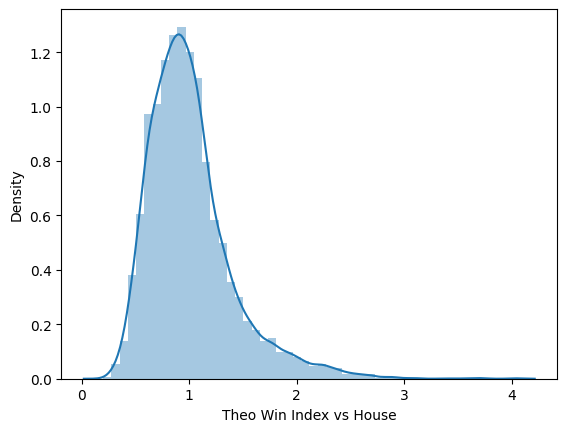

In [ ]:
sns.distplot(df['Theo Win Index vs House'])

In [ ]:
# Detect outliers in 'Theo Win Index vs House' column using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers in 'Theo Win Index vs House' column
column_name = 'Theo Win Index vs House'
outliers = detect_outliers_iqr(df[column_name])

# Calculate the percentage of outliers
num_outliers = len(outliers)
total_values = len(df[column_name])
percentage_outliers = (num_outliers / total_values) * 100

# Display the outliers and the percentage
print(f"Outliers in '{column_name}' column:")
print(outliers)
print(f"\nPercentage of outliers: {percentage_outliers:.2f}%")

Outliers in 'Theo Win Index vs House' column:
12       2.377807
13       2.475550
19       1.865455
51       1.885552
79       1.841494
           ...   
12888    4.034127
12905    2.248870
12906    2.385353
12907    2.408250
12914    2.107722
Name: Theo Win Index vs House, Length: 616, dtype: float64

Percentage of outliers: 4.77%


<Axes: ylabel='Theo Win Index vs House'>

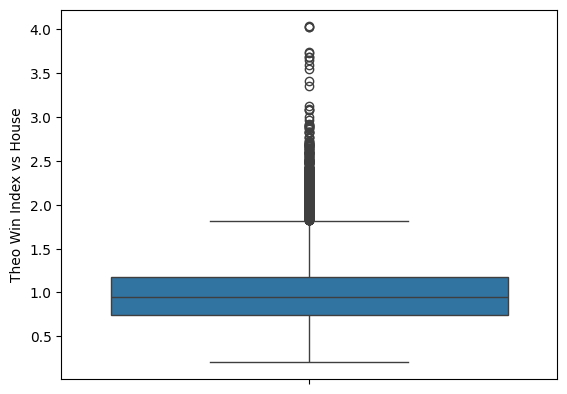

In [ ]:
sns.boxplot(df['Theo Win Index vs House'])

In [ ]:

df['Theo Win Index vs House Log'] = np.log(df['Theo Win Index vs House'])

In [ ]:
# Detect outliers in 'Theo Win Index vs House' column
column_name = 'Theo Win Index vs House Log'
outliers = detect_outliers_iqr(df[column_name])

# Calculate the percentage of outliers
num_outliers = len(outliers)
total_values = len(df[column_name])
percentage_outliers = (num_outliers / total_values) * 100

# Display the outliers and the percentage
print(f"Outliers in '{column_name}' column:")
print(outliers)
print(f"\nPercentage of outliers: {percentage_outliers:.2f}%")

Outliers in 'Theo Win Index vs House Log' column:
0       -1.053187
1       -1.151193
12       0.866178
13       0.906462
71      -1.095495
           ...   
12833    0.880049
12883   -1.061840
12888    1.394790
12906    0.869347
12907    0.878900
Name: Theo Win Index vs House Log, Length: 237, dtype: float64

Percentage of outliers: 1.83%


#Problem 1 Solution :
**Identify how slot game performance metrics vary over different months and years to detect any seasonal trends or significant changes over time.**

---







In [ ]:
df_1 = pd.concat([df['Game_mapped'],df[temporal_columns], df['Theo Win Index vs House'],df['Theo Win Index vs House Log'] ], axis=1)
df_1.head(5)

,Game_mapped,month,year,Theo Win Index vs House,Theo Win Index vs House Log
0,game1,jan,2022,0.348824,-1.053187
1,game1_2,jan,2022,0.316259,-1.151193
2,game2,jan,2022,1.394006,0.332181
3,game2_2,jan,2022,1.089682,0.085886
4,game2_3,jan,2022,1.693616,0.526866


In [ ]:
# Find missing data values
missing_data = df_1.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
if not missing_columns.empty:
    print(missing_columns)
else:
    print("No missing values found in columns")




No missing values found in columns


In [ ]:
# Convert 'month' and 'year' columns to datetime
df_1['date'] = pd.to_datetime(df_1['month'].astype(str) + '-' + df_1['year'].astype(str), format='%b-%Y')
df_1.head(3)

,Game_mapped,month,year,Theo Win Index vs House,Theo Win Index vs House Log,date
0,game1,jan,2022,0.348824,-1.053187,2022-01-01
1,game1_2,jan,2022,0.316259,-1.151193,2022-01-01
2,game2,jan,2022,1.394006,0.332181,2022-01-01


In [ ]:
# Aggregate data by month and year
monthly_performance = df_1.groupby('date')['Theo Win Index vs House Log'].mean().reset_index()
monthly_performance.head(5)


,date,Theo Win Index vs House Log
0,2022-01-01,0.019339
1,2022-02-01,0.041306
2,2022-03-01,0.029207
3,2022-04-01,0.018323
4,2022-05-01,0.015050


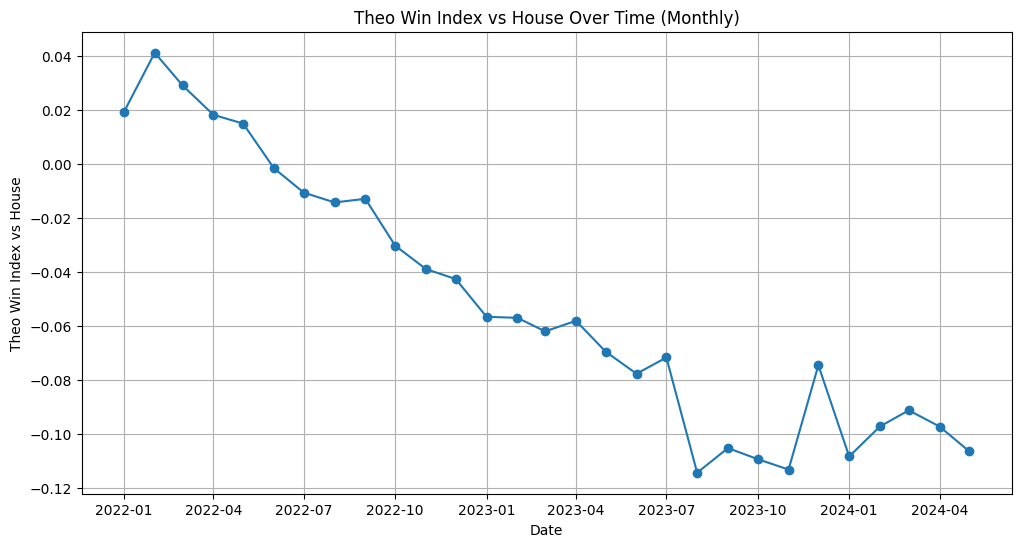

In [ ]:
# Plot the trends using line plots
plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['date'], monthly_performance['Theo Win Index vs House Log'], marker='o')
plt.title('Theo Win Index vs House Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Theo Win Index vs House')
plt.grid(True)
plt.show()

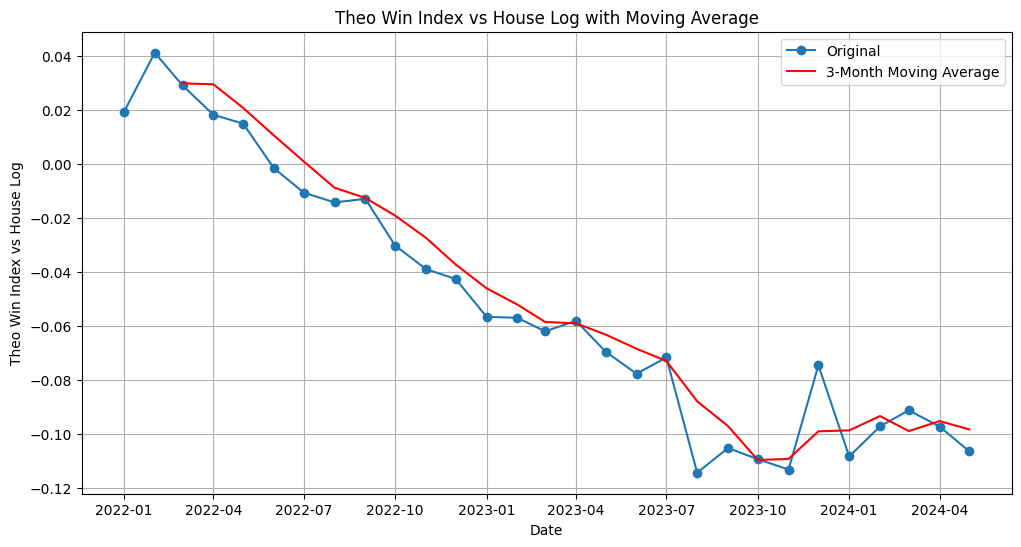

In [ ]:
# Calculate and plot moving averages
monthly_performance['moving_avg'] = monthly_performance['Theo Win Index vs House Log'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['date'], monthly_performance['Theo Win Index vs House Log'], marker='o', label='Original')
plt.plot(monthly_performance['date'], monthly_performance['moving_avg'], color='red', label='3-Month Moving Average')
plt.title('Theo Win Index vs House Log with Moving Average')
plt.xlabel('Date')
plt.ylabel('Theo Win Index vs House Log')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_performance.set_index('date')['Theo Win Index vs House Log'], model='additive', period=12)


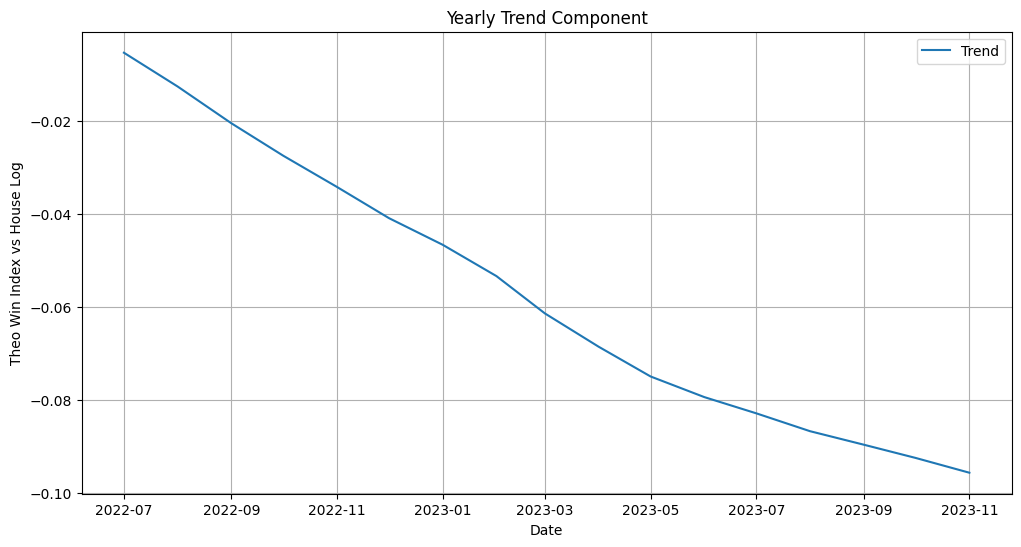

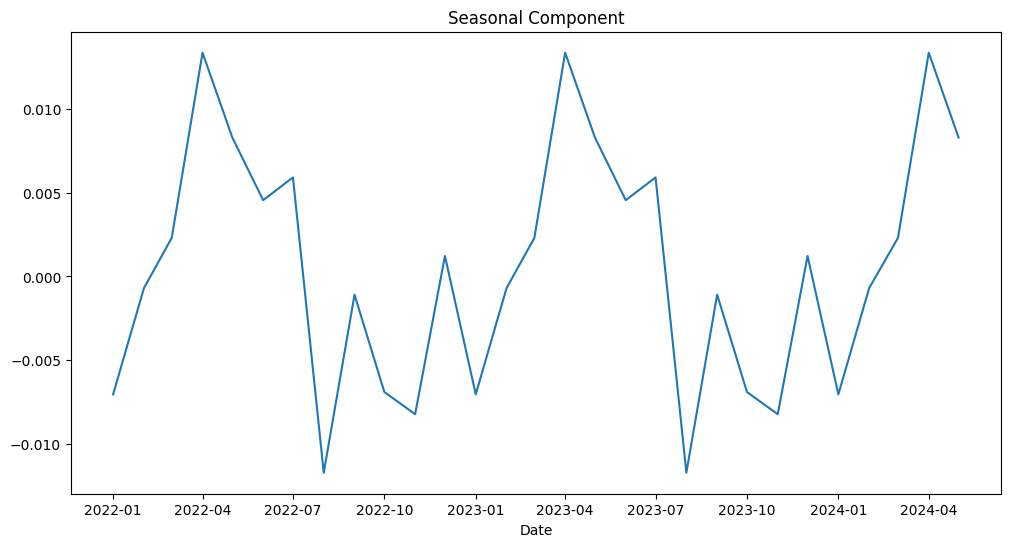

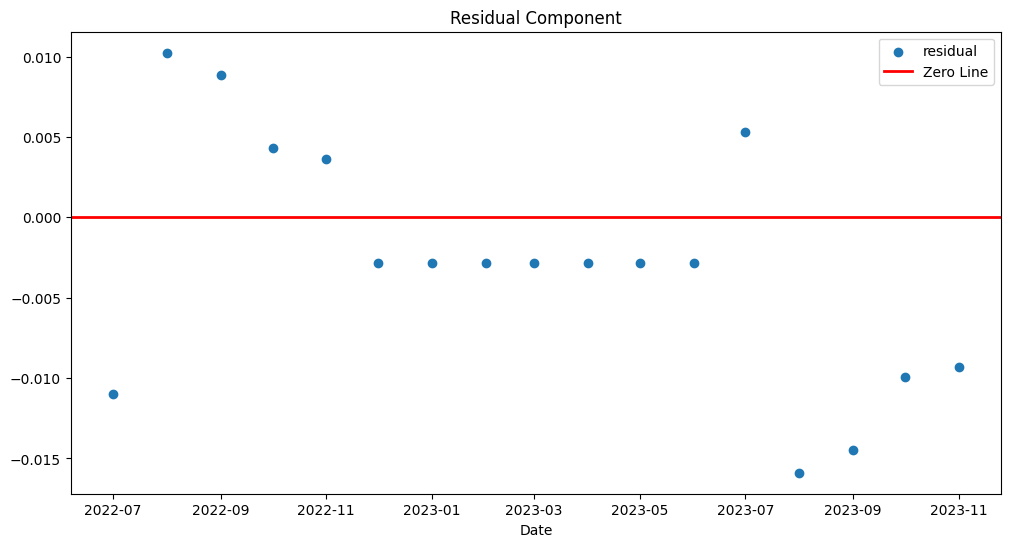

In [ ]:
# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the seasonal and yearly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['date'], trend, label='Trend')
plt.title('Yearly Trend Component')
plt.xlabel('Date')
plt.ylabel('Theo Win Index vs House Log')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.xlabel('Date')

plt.figure(figsize=(12, 6))
plt.scatter(monthly_performance['date'], residual, label='residual')
plt.axhline(y=0, color='r', linestyle='-', linewidth=2, label='Zero Line')
plt.title('Residual Component')
plt.xlabel('Date')
plt.legend()
plt.show()

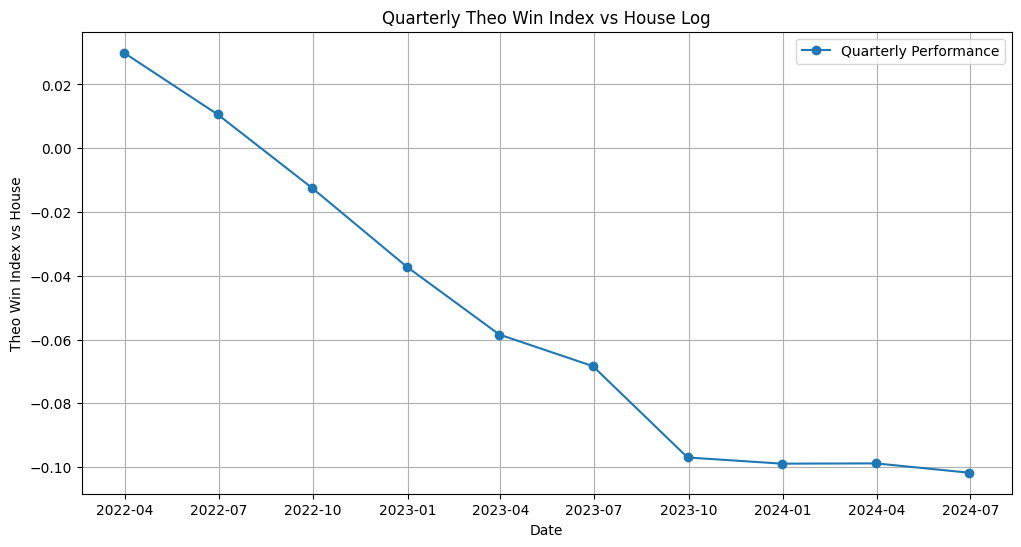

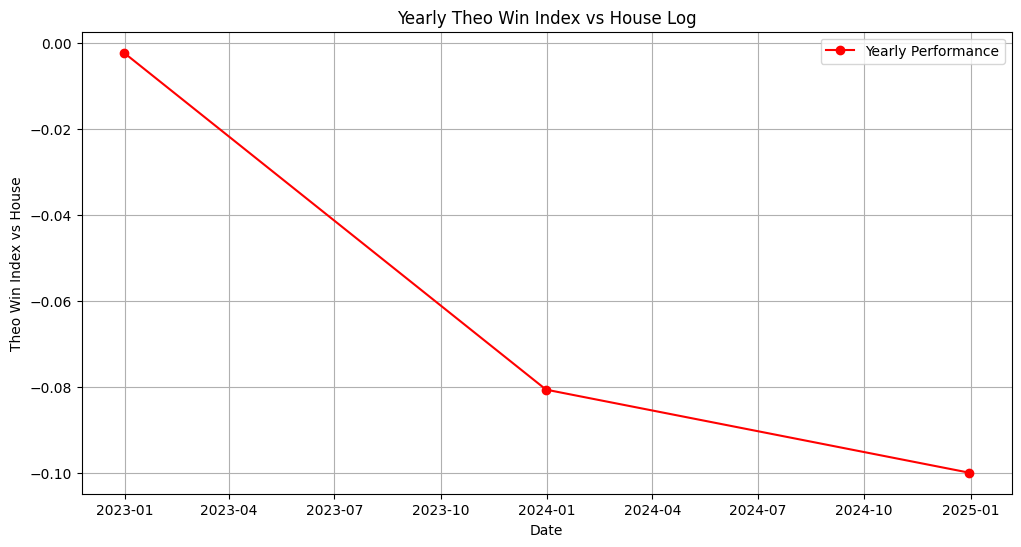

In [ ]:
# Set the date column as the index
monthly_performance.set_index('date', inplace=True)

# Ensure the index is of datetime type
monthly_performance.index = pd.to_datetime(monthly_performance.index)

# Resample the data to get quarterly and yearly performance
quarterly_performance = monthly_performance['Theo Win Index vs House Log'].resample('Q').mean()
yearly_performance = monthly_performance['Theo Win Index vs House Log'].resample('Y').mean()

# Plot the quarterly performance
plt.figure(figsize=(12, 6))
plt.plot(quarterly_performance.index, quarterly_performance, marker='o', label='Quarterly Performance')
plt.title('Quarterly Theo Win Index vs House Log')
plt.xlabel('Date')
plt.ylabel('Theo Win Index vs House')
plt.legend()
plt.grid(True)
plt.show()

# Plot the yearly performance
plt.figure(figsize=(12, 6))
plt.plot(yearly_performance.index, yearly_performance, marker='o', color='red', label='Yearly Performance')
plt.title('Yearly Theo Win Index vs House Log')
plt.xlabel('Date')
plt.ylabel('Theo Win Index vs House')
plt.legend()
plt.grid(True)
plt.show()

Overall Comments :

*   The trend is in downward. The performance of game is descreasing.
*   There are some seasonal fluctuations. We can see that in the seasonal trend. April is a significant month where the perfomence got higher.

--- Upgrade : ARIMA model can be used for forecasting and for more information.



In [ ]:
df = df.drop(['month','Game_mapped','Frequent Max Bet','Game Line Count','Persistence Cycles (Pots)','Theo Win Index vs Zone'], axis = 1)

#Problem 2 Solution :
**Assess how the number of casinos and units affects a game's performance.**

---



In [ ]:
features_for_2 = ['# Casinos','# Units','Theo Win Index vs House']
df_2 = df.filter(features_for_2)
df_2.head(5)

,# Casinos,# Units,Theo Win Index vs House
0,9,14,1.012552
1,7,14,0.758572
2,22,39,0.348824
3,21,35,0.316259
4,96,291,1.394006


In [ ]:
# Find missing data values
missing_data = df_2.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
if not missing_columns.empty:
    print(missing_columns)
else:
    print("No missing values found in columns")

No missing values found in columns


Correlation Matrix:
                         # Casinos   # Units  Theo Win Index vs House
# Casinos                 1.000000  0.858365                 0.201978
# Units                   0.858365  1.000000                 0.229507
Theo Win Index vs House   0.201978  0.229507                 1.000000


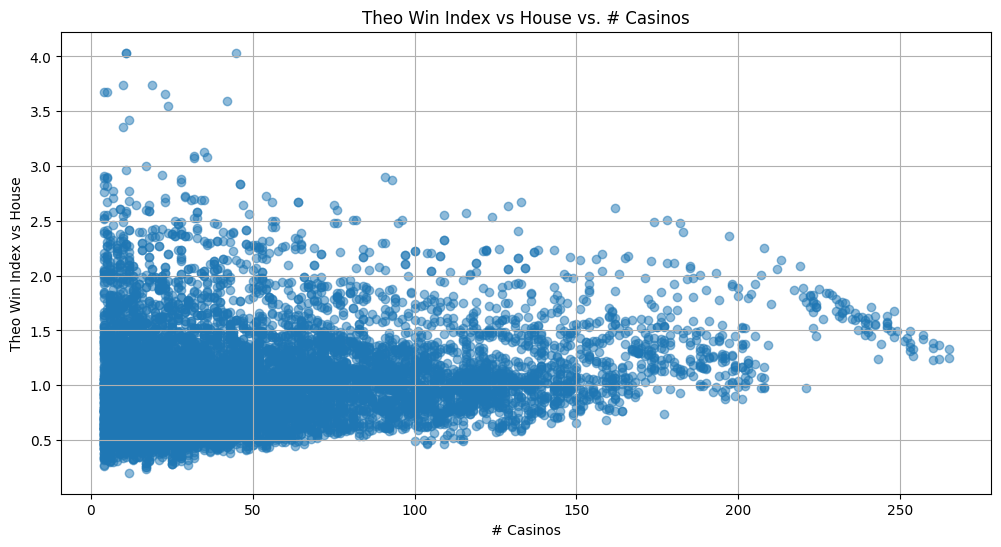

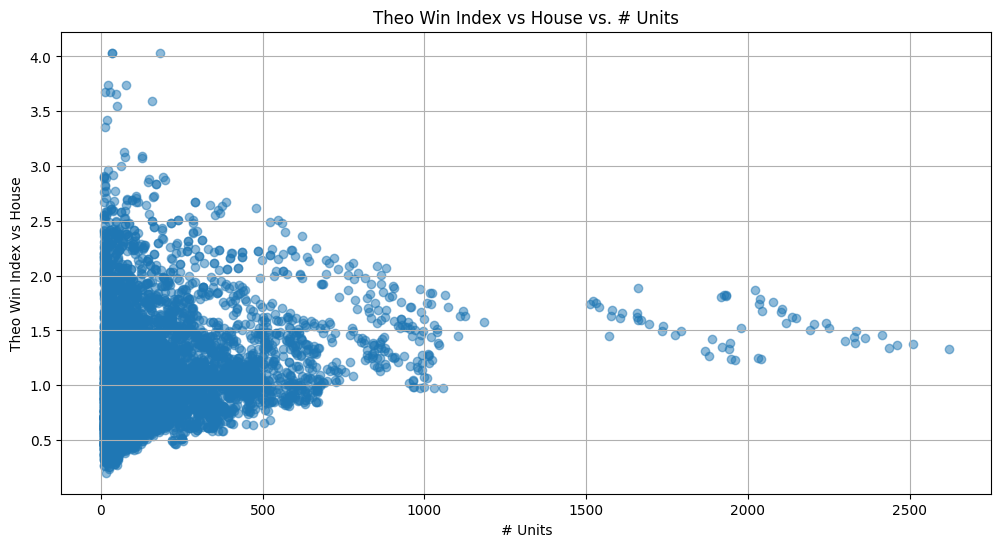

In [ ]:
# Calculate correlations
correlation_matrix = df_2.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Create scatter plots to visualize the relationships
plt.figure(figsize=(12, 6))
plt.scatter(df_2['# Casinos'], df_2['Theo Win Index vs House'], alpha=0.5)
plt.title('Theo Win Index vs House vs. # Casinos')
plt.xlabel('# Casinos')
plt.ylabel('Theo Win Index vs House')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df_2['# Units'], df_2['Theo Win Index vs House'], alpha=0.5)
plt.title('Theo Win Index vs House vs. # Units')
plt.xlabel('# Units')
plt.ylabel('Theo Win Index vs House')
plt.grid(True)
plt.show()

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]



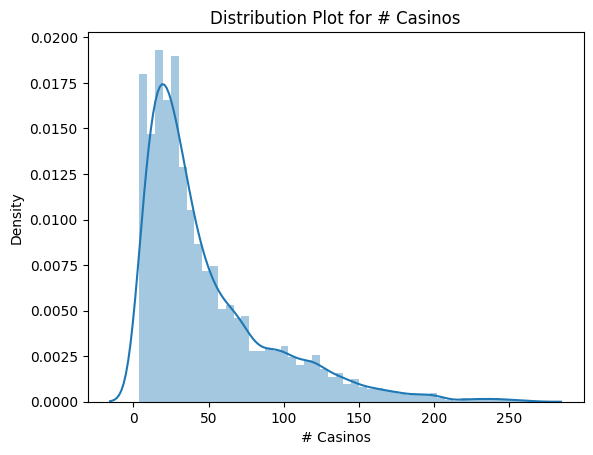

Outliers in '# Casinos' column:
21       217
22       147
53       220
82       143
117      158
        ... 
12902    208
12903    174
12907    151
12908    171
12909    142
Name: # Casinos, Length: 651, dtype: int64

Percentage of outliers: 5.04%



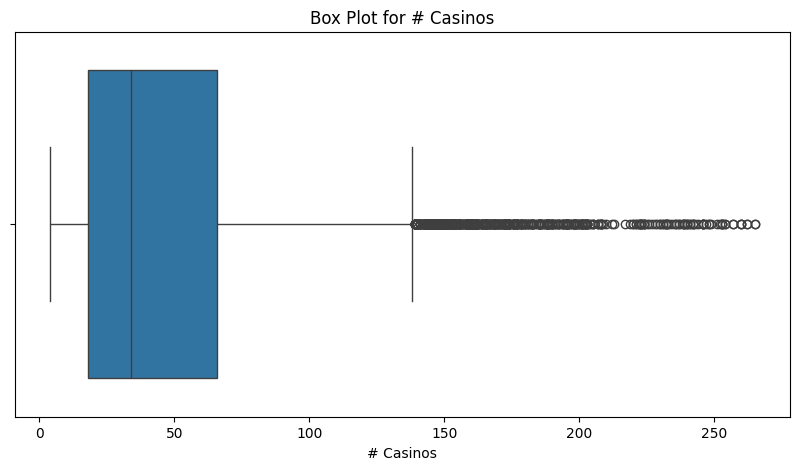

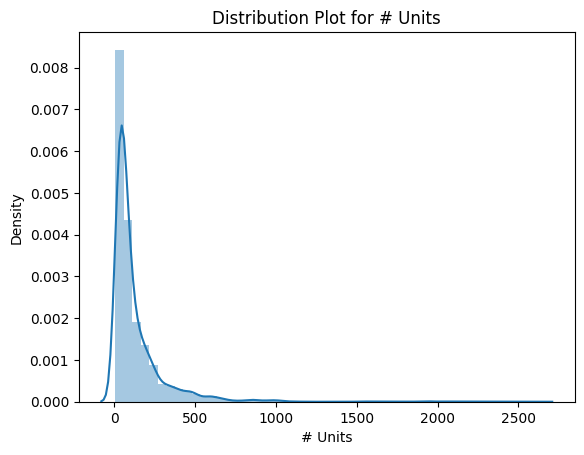

Outliers in '# Units' column:
8         594
20        493
21       2023
22        847
24        407
         ... 
12903     815
12904     341
12907     728
12908     616
12909     504
Name: # Units, Length: 1185, dtype: int64

Percentage of outliers: 9.17%



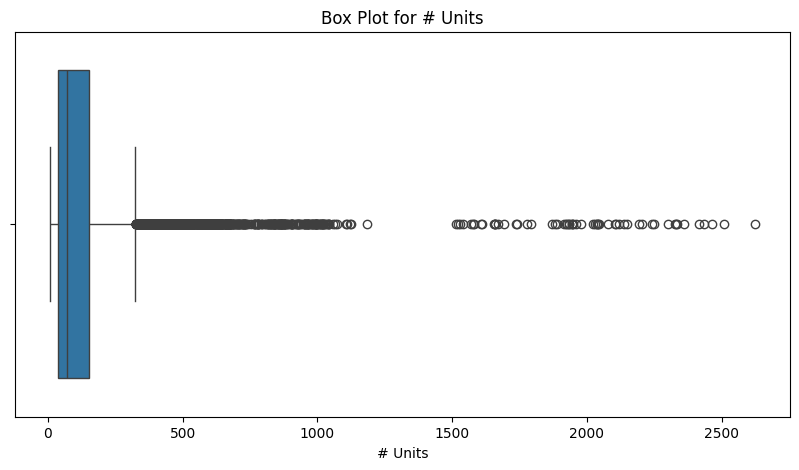

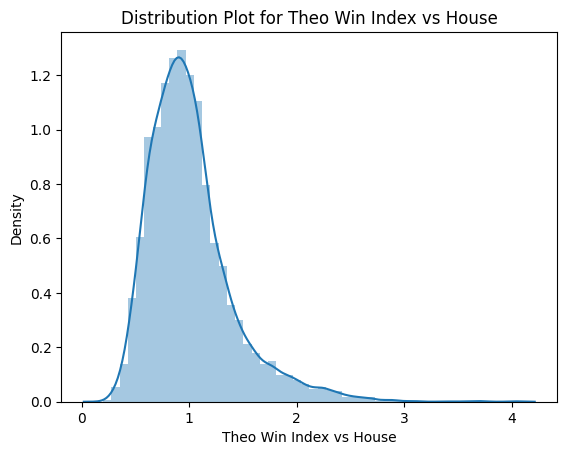

Outliers in 'Theo Win Index vs House' column:
14       2.377807
15       2.475550
21       1.865455
53       1.885552
81       1.841494
           ...   
12139    2.138856
12206    1.901640
12420    2.060761
12694    2.088470
12717    1.848227
Name: Theo Win Index vs House, Length: 616, dtype: float64

Percentage of outliers: 4.77%



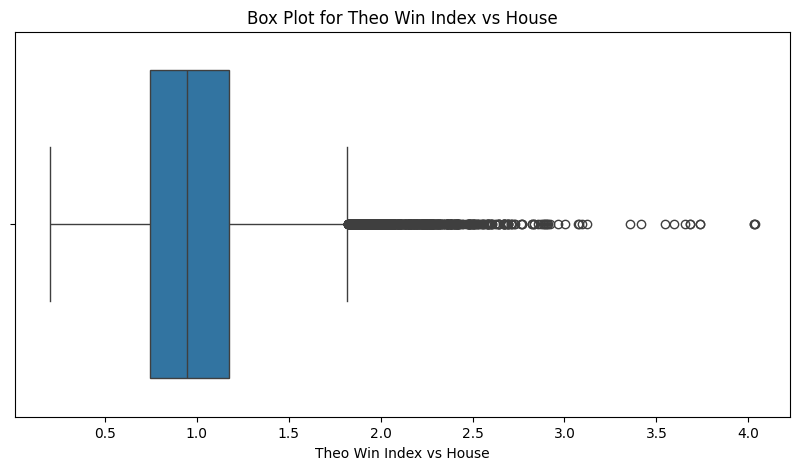

In [ ]:
# Columns to check for outliers
features_for_2 = ['# Casinos', '# Units', 'Theo Win Index vs House']
df_2 = df[features_for_2]

# Detect outliers and calculate percentage for each column
for column_name in features_for_2:
    outliers = detect_outliers_iqr(df_2[column_name])

    #Distplot
    sns.distplot(df_2[column_name])
    plt.title(f'Distribution Plot for {column_name}')
    plt.show()

    # Calculate the percentage of outliers
    num_outliers = len(outliers)
    total_values = len(df_2[column_name])
    percentage_outliers = (num_outliers / total_values) * 100

    # Display the outliers and the percentage
    print(f"Outliers in '{column_name}' column:")
    print(outliers)
    print(f"\nPercentage of outliers: {percentage_outliers:.2f}%\n")

    # Plot box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_2[column_name])
    plt.title(f'Box Plot for {column_name}')
    plt.show()

In [ ]:
# Apply log transformation
for column_name in features_for_2:
    # Check for non-positive values
    if (df_2[column_name] <= 0).any():
        print(f"Warning: Column '{column_name}' contains non-positive values. Skipping log transformation for this column.")
        continue

    # Apply log transformation
    df_2[f'{column_name}_log'] = np.log(df_2[column_name])

# Display the transformed DataFrame
print(df_2.head())

   # Casinos  # Units  Theo Win Index vs House  # Casinos_log  # Units_log  \
0          9       14                 1.012552       2.197225     2.639057   
1          7       14                 0.758572       1.945910     2.639057   
2         22       39                 0.348824       3.091042     3.663562   
3         21       35                 0.316259       3.044522     3.555348   
4         96      291                 1.394006       4.564348     5.673323   

   Theo Win Index vs House_log  
0                     0.012474  
1                    -0.276318  
2                    -1.053187  
3                    -1.151193  
4                     0.332181  


In [ ]:
df_2_log = df_2.drop(features_for_2, axis = 1)
df_2_log.head(5)

,# Casinos_log,# Units_log,Theo Win Index vs House_log
0,2.197225,2.639057,0.012474
1,1.945910,2.639057,-0.276318
2,3.091042,3.663562,-1.053187
3,3.044522,3.555348,-1.151193
4,4.564348,5.673323,0.332181


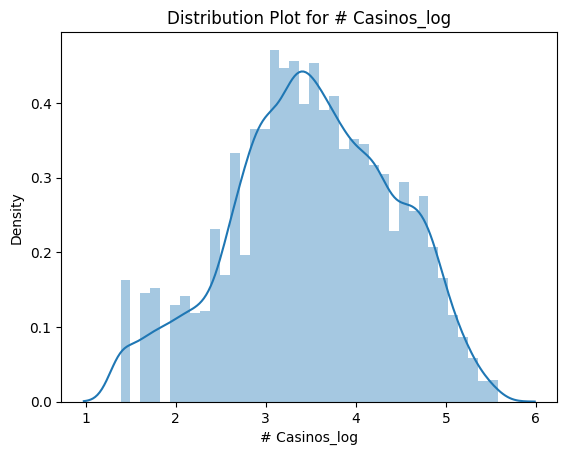

Outliers in '# Casinos_log' column:
Series([], Name: # Casinos_log, dtype: float64)

Percentage of outliers: 0.00%



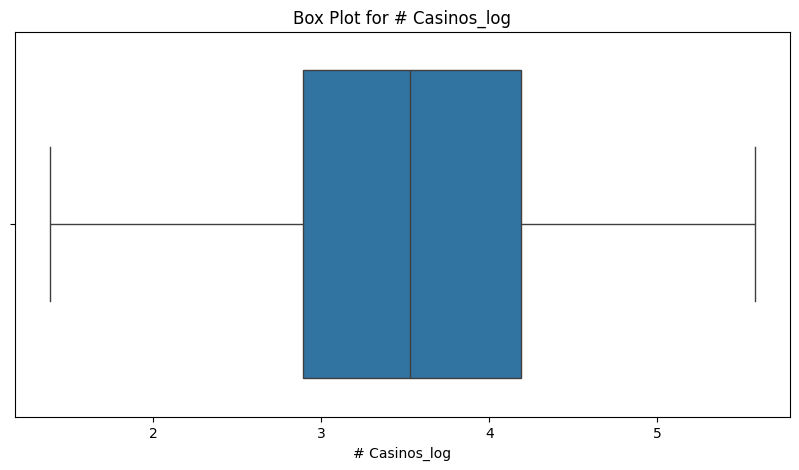

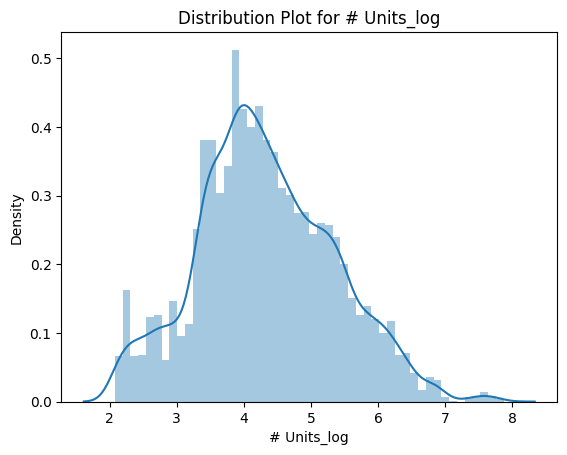

Outliers in '# Units_log' column:
21       7.612337
53       7.413970
357      7.557995
390      7.321850
702      7.563720
739      7.327123
1080     7.566828
1121     7.333023
1476     7.567346
1516     7.338888
1885     7.619724
1925     7.365813
2294     7.618742
2334     7.362645
2697     7.639161
2738     7.384610
3116     7.652546
3157     7.412764
3534     7.651596
3579     7.413970
3973     7.623153
4017     7.381502
4411     7.667626
4455     7.412160
5694     7.672292
5738     7.420579
6136     7.658228
6182     7.434257
6592     7.714677
6633     7.458763
7035     7.698483
7076     7.461066
7493     7.718685
7535     7.491645
7958     7.693026
8000     7.482119
8421     7.589842
8463     7.359468
8852     7.755339
8894     7.544332
9294     7.789869
9337     7.572503
9723     7.766841
9765     7.560601
10127    7.752765
10169    7.571988
10514    7.740230
10552    7.533159
11549    7.753624
11586    7.539559
11828    7.808729
11867    7.616284
12108    7.797702
12145    7.5

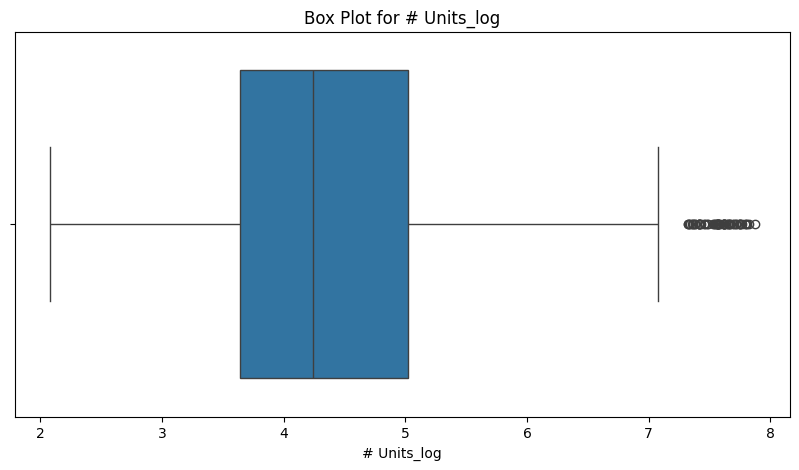

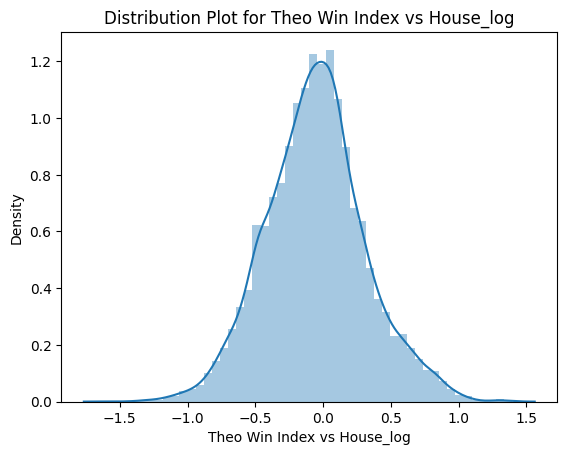

Outliers in 'Theo Win Index vs House_log' column:
2       -1.053187
3       -1.151193
14       0.866178
15       0.906462
73      -1.095495
           ...   
11457    0.853536
11465    0.869347
11484    0.868169
11526    0.878900
11580    0.861325
Name: Theo Win Index vs House_log, Length: 237, dtype: float64

Percentage of outliers: 1.83%



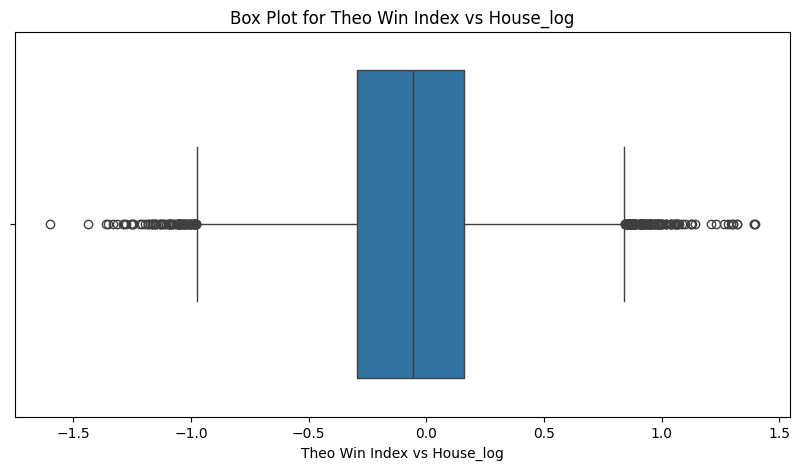

In [ ]:
#outliers profile after log transform
# Columns to check for outliers
features_for_2 = ['# Casinos_log', '# Units_log', 'Theo Win Index vs House_log']


# Detect outliers and calculate percentage for each column
for column_name in features_for_2:
    outliers = detect_outliers_iqr(df_2_log[column_name])

    #Distplot
    sns.distplot(df_2_log[column_name])
    plt.title(f'Distribution Plot for {column_name}')
    plt.show()

    # Calculate the percentage of outliers
    num_outliers = len(outliers)
    total_values = len(df_2_log[column_name])
    percentage_outliers = (num_outliers / total_values) * 100

    # Display the outliers and the percentage
    print(f"Outliers in '{column_name}' column:")
    print(outliers)
    print(f"\nPercentage of outliers: {percentage_outliers:.2f}%\n")

    # Plot box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_2_log[column_name])
    plt.title(f'Box Plot for {column_name}')
    plt.show()


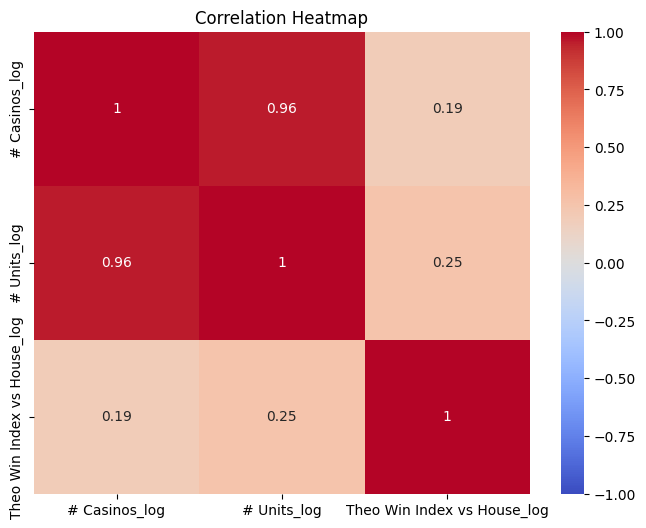

In [ ]:
# Compute the correlation matrix
corr_matrix = df_2_log[['# Casinos_log', '# Units_log', 'Theo Win Index vs House_log']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
# Independent and dependent variables
X = df_2_log[['# Casinos_log', '# Units_log']]
y = df_2_log['Theo Win Index vs House_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Fit a multiple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_standardized, y_train)

# Predictions and evaluation for linear regression
y_pred_lin_reg = lin_reg.predict(X_test_standardized)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# Print results
print("Multiple Linear Regression")
print(f"Mean Squared Error: {mse_lin_reg:.4f}")
print(f"R-squared: {r2_lin_reg:.4f}\n")

Multiple Linear Regression
Mean Squared Error: 0.1267
R-squared: 0.0903



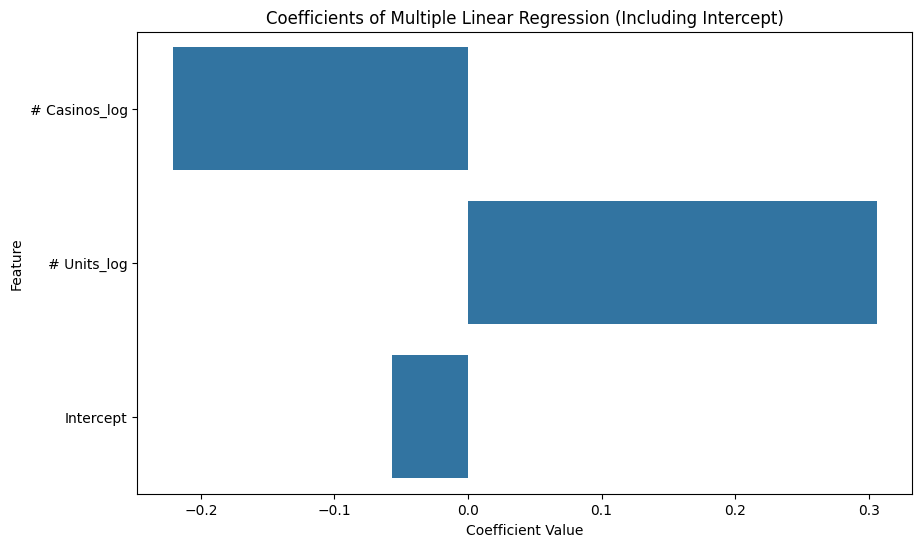

In [ ]:
# Get the coefficients and intercept
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_
feature_names = X.columns

# Combine the coefficients and intercept into a DataFrame
coeff_data = {
    'Feature': list(feature_names) + ['Intercept'],
    'Coefficient': list(coefficients) + [intercept]
}
coeff_df = pd.DataFrame(coeff_data)

# Create a bar plot of the coefficients and intercept
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Coefficients of Multiple Linear Regression (Including Intercept)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
coeff_df

,Feature,Coefficient
0,# Casinos_log,-0.221114
1,# Units_log,0.306269
2,Intercept,-0.056628


Overall Comments :

*   Very Week correlation between Casion, Units and Theo House Index score
*   all of them contained outliers. So, Log transformation is used to mitigate the effect of Outliers. The whole analysis is done on this.

* Casinos has a negative impact.
* Units has a positive impact


*   But the impacts are very less.
*   They only explains 9.03% of total variance of the score.









#Problem 3 Solution :
**Determine the impact of different suppliers on game performance.**

---



In [ ]:
# Filter the dataset to include only necessary columns
df_3 = df[['Supplier_mapped', 'Theo Win Index vs House']].dropna()

# Display the first few rows of df_3 to verify
print(df_3.head())

  Supplier_mapped  Theo Win Index vs House
0      supplier10                 1.012552
1      supplier10                 0.758572
2       supplier1                 0.348824
3       supplier1                 0.316259
4       supplier1                 1.394006


In [ ]:
df_3.describe(include = 'all')

,Supplier_mapped,Theo Win Index vs House
count,12918,12918.000000
unique,15,NaN
top,supplier1,NaN
freq,3520,NaN
mean,NaN,1.013329
std,NaN,0.399997
min,NaN,0.202224
25%,NaN,0.745000
50%,NaN,0.944613
75%,NaN,1.174860


In [ ]:
# Calculate descriptive statistics for each supplier
supplier_stats = df_3.groupby('Supplier_mapped')['Theo Win Index vs House'].describe()
print("Descriptive Statistics by Supplier:")
print(supplier_stats)

Descriptive Statistics by Supplier:
                  count      mean       std       min       25%       50%  \
Supplier_mapped                                                             
supplier1        3520.0  1.153661  0.446658  0.276817  0.887838  1.043486   
supplier10        286.0  0.754567  0.290134  0.345819  0.559209  0.685945   
supplier11         26.0  0.868442  0.233244  0.461691  0.679052  0.898374   
supplier12         84.0  0.749105  0.213138  0.409070  0.610091  0.707104   
supplier13        114.0  0.935729  0.288096  0.526070  0.709159  0.949439   
supplier14         33.0  0.897849  0.268445  0.440876  0.686178  0.921926   
supplier15         12.0  1.329938  0.069622  1.241437  1.287541  1.314386   
supplier2        2625.0  0.990449  0.408701  0.336842  0.694359  0.910265   
supplier3        1423.0  0.953176  0.302997  0.202224  0.756396  0.937461   
supplier4        1630.0  0.971323  0.355691  0.299220  0.717555  0.887103   
supplier5         995.0  0.924771  0.338

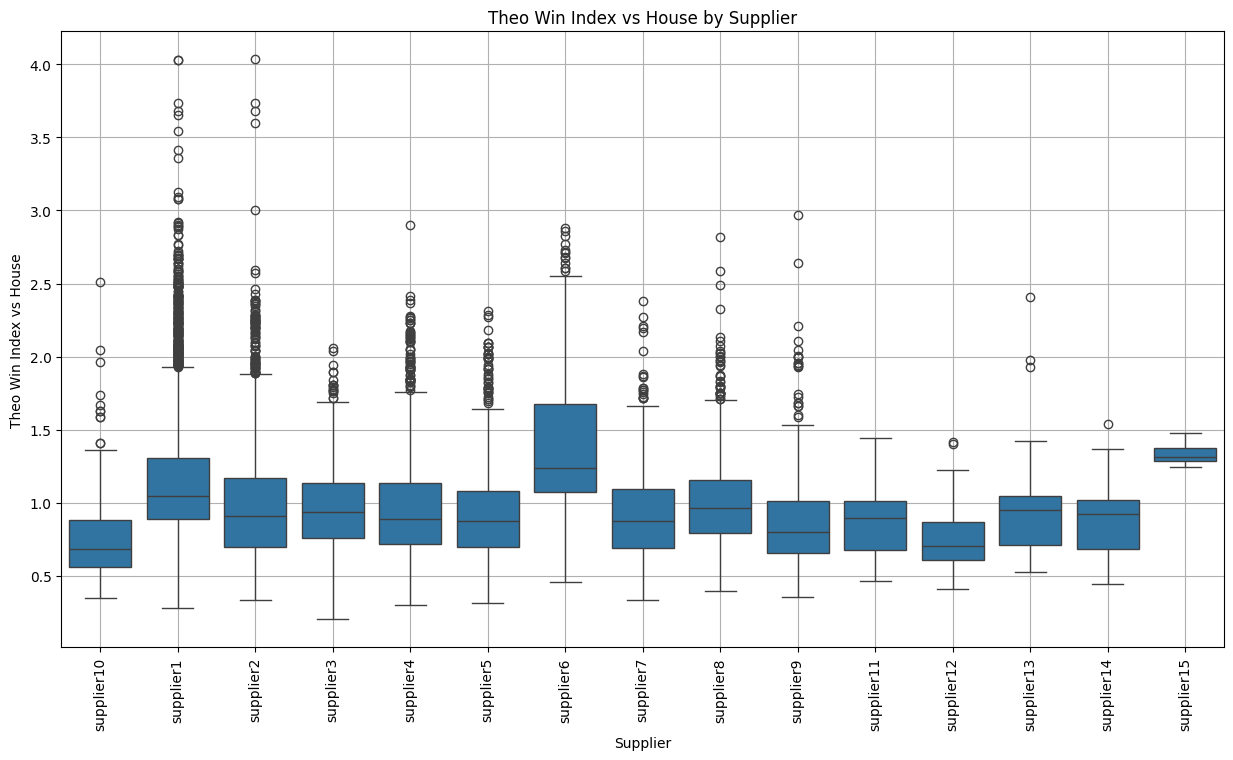

In [ ]:
# Create box plots to visualize performance distributions by supplier
plt.figure(figsize=(15, 8))
sns.boxplot(x='Supplier_mapped', y='Theo Win Index vs House', data=df_3)
plt.title('Theo Win Index vs House by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Theo Win Index vs House')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


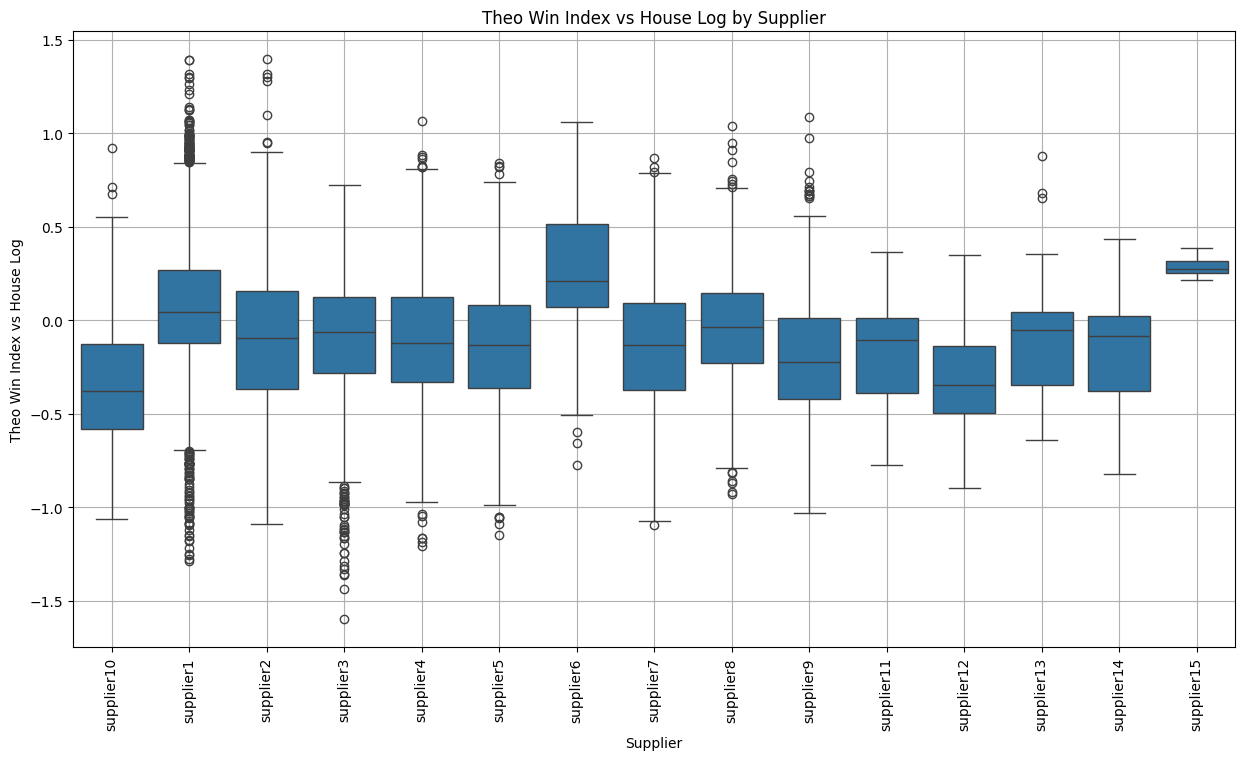

In [ ]:
df_3['Theo Win Index vs House Log'] = np.log(df_3['Theo Win Index vs House'])
# Create box plots to visualize performance distributions by supplier
plt.figure(figsize=(15, 8))
sns.boxplot(x='Supplier_mapped', y='Theo Win Index vs House Log', data=df_3)
plt.title('Theo Win Index vs House Log by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Theo Win Index vs House Log')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
import scipy.stats as stats
# Perform ANOVA to test if there are significant differences in performance between suppliers
anova_result = stats.f_oneway(*[group['Theo Win Index vs House'].values for name, group in df_3.groupby('Supplier_mapped')])
print("ANOVA Result:")
print(anova_result)

ANOVA Result:
F_onewayResult(statistic=76.86872412095536, pvalue=7.494273298882038e-212)


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Perform ANOVA using statsmodels
model = ols('Q("Theo Win Index vs House") ~ C(Supplier_mapped)', data=df_3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                         sum_sq       df          F         PR(>F)
C(Supplier_mapped)   159.100796     14.0  76.868724  7.494273e-212
Residual            1907.591333  12903.0        NaN            NaN


In [ ]:
features = df_3['Supplier_mapped']
X_dummy = pd.get_dummies(features, drop_first = True).astype(int)
y = df_3 ['Theo Win Index vs House Log']
X = X_dummy

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.12824215669999903
R-squared: 0.07899249373306227


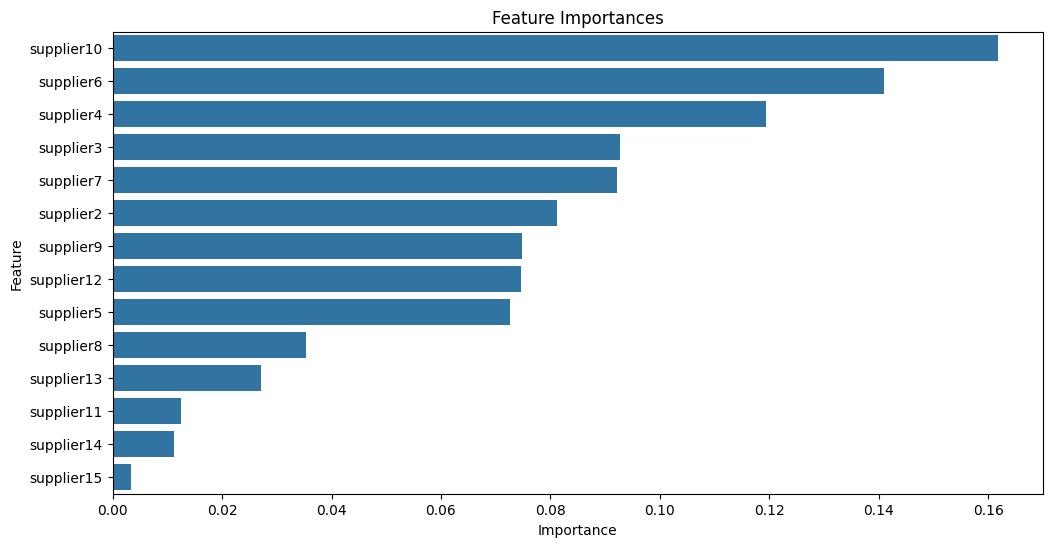

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

Overall Comment:


*   The outliers were handeled before procceding to the analysis.
*   ANOVA results were significant which implies that we could reject the null hypothesis meaning we have significant differences among the means.
*   To asses , the impact we fitted a Random Forest Model.
*   The Barplot shows the importance of each feature on the outcome.
*   This feature only explains 7.89% of total variance.








#Problem 5 Solution :
**Explore the correlation between the number of casinos and units**

---



In [ ]:
# Filter the dataset to include relevant columns and drop missing values

columns_4 = ['# Casinos', '# Units','Type', 'Supplier_mapped']
df_4 = df[columns_4]
df_corr = df_4[['# Casinos', '# Units']].dropna()

# Calculate overall correlation
overall_corr = df_corr.corr().loc['# Casinos', '# Units']
print(f"Overall Correlation between # Casinos and # Units: {overall_corr}")

Overall Correlation between # Casinos and # Units: 0.8583649937045968


In [ ]:
# Calculate correlation by game type
def calculate_corr(group):
    if group['# Casinos'].nunique() > 1 and group['# Units'].nunique() > 1:
        return group[['# Casinos', '# Units']].corr().iloc[0, 1]
    else:
        return np.nan

corr_by_type = df.groupby('Type').apply(calculate_corr).dropna()
corr_by_type.name = 'Correlation'

print("Correlation between # Casinos and # Units by Game Type:")
print(corr_by_type)



Correlation between # Casinos and # Units by Game Type:
Type
Cash on Reels             0.853821
Credit Prize              0.972610
Expanding Reels           0.948618
Feature Combo             0.931375
Free Games                0.895220
Free Games/Hold & Spin    0.994912
Free Games/Multiplier     0.956635
Frenzy                    0.731167
Hold & Spin               0.938835
Jackpot                   0.965369
Multi-Feature             0.991158
Multigame                 0.949991
Multiplier                0.989340
Mystery Award             0.256978
Novelty                   0.985350
Pick Bonus                0.967434
Respin                    0.991685
Symbol Upgrade            0.983430
Traditional               0.976651
Traditional/Multiplier    0.890203
True Persistence          0.970771
Wheel                     0.919018
Wild Multiplier           0.896685
Wilds                     0.970956
Name: Correlation, dtype: float64


In [ ]:
# Calculate correlation by supplier
corr_by_supplier = df.groupby('Supplier_mapped').apply(calculate_corr).dropna()
corr_by_supplier.name = 'Correlation'

print("Correlation between # Casinos and # Units by Supplier:")
print(corr_by_supplier)


Correlation between # Casinos and # Units by Supplier:
Supplier_mapped
supplier1     0.875634
supplier10    0.970357
supplier11    0.764873
supplier12    0.969831
supplier13    0.977140
supplier14    0.916017
supplier15    0.909509
supplier2     0.843601
supplier3     0.976620
supplier4     0.928949
supplier5     0.975105
supplier6     0.962484
supplier7     0.939857
supplier8     0.963447
supplier9     0.978145
Name: Correlation, dtype: float64


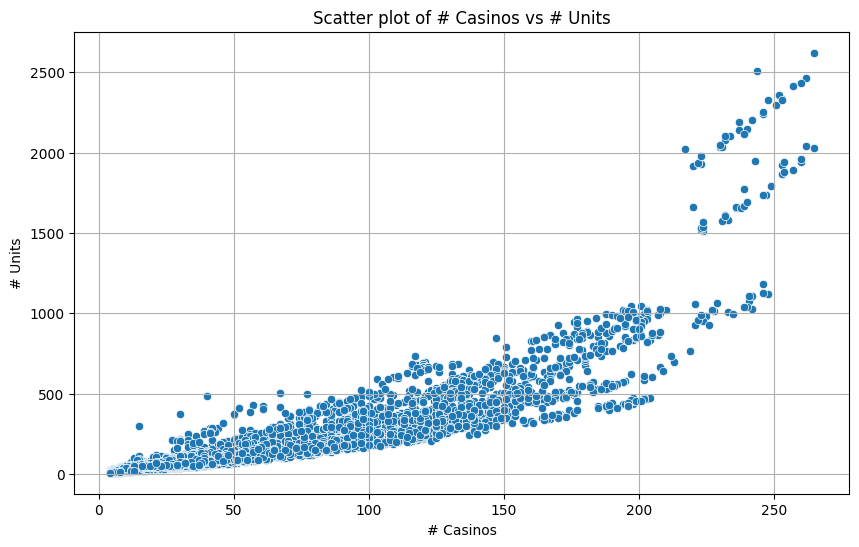

In [ ]:
# Scatter plot for overall correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='# Casinos', y='# Units', data=df)
plt.title('Scatter plot of # Casinos vs # Units')
plt.xlabel('# Casinos')
plt.ylabel('# Units')
plt.grid(True)
plt.show()





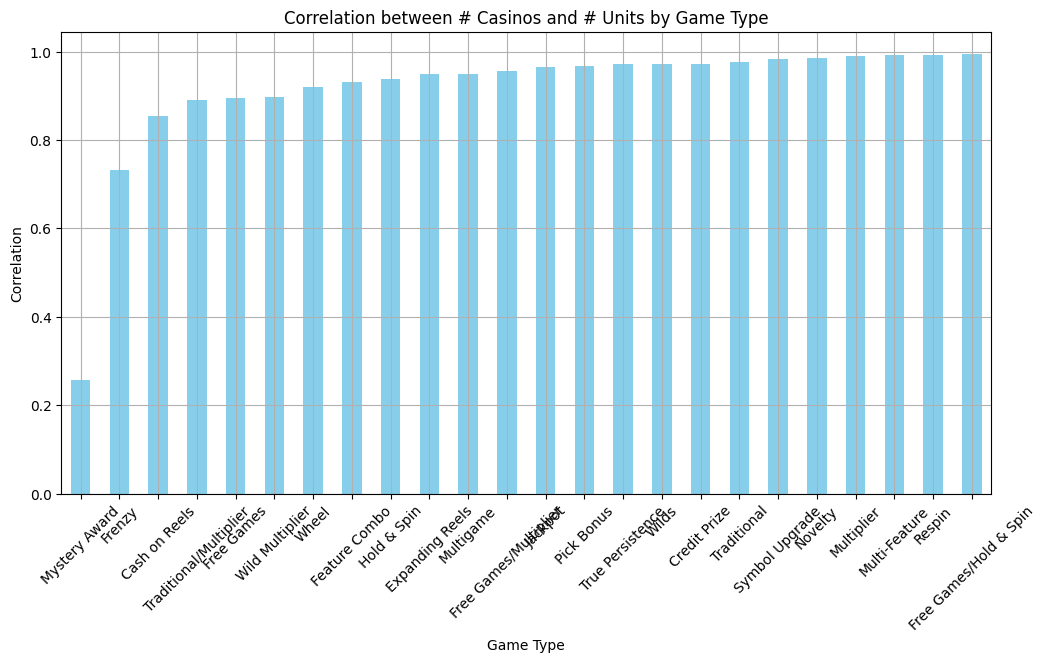

In [ ]:
# Bar plot for correlation by game type
plt.figure(figsize=(12, 6))
corr_by_type.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlation between # Casinos and # Units by Game Type')
plt.ylabel('Correlation')
plt.xlabel('Game Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



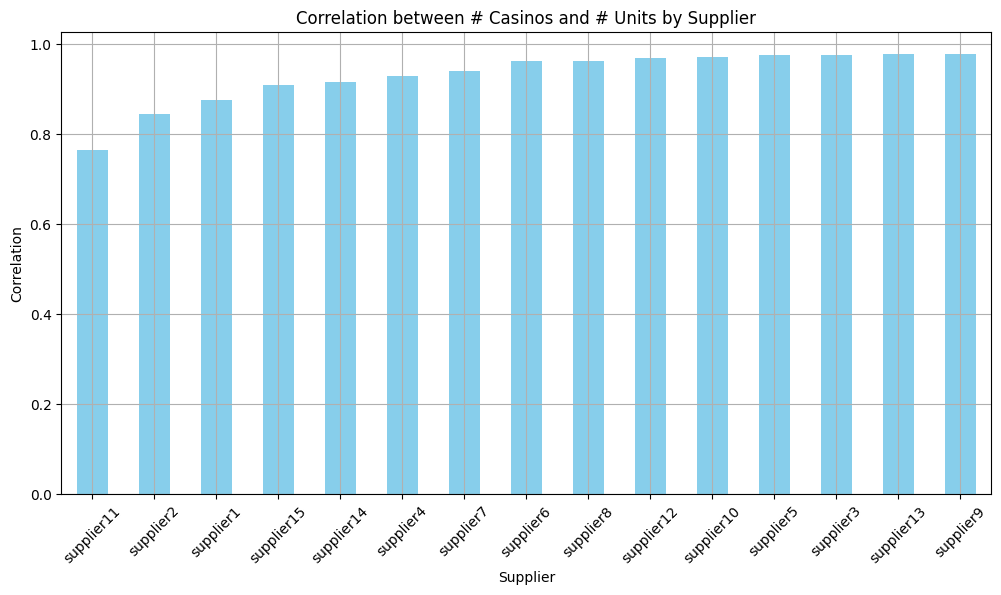

In [ ]:
# Bar plot for correlation by supplier
plt.figure(figsize=(12, 6))
corr_by_supplier.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlation between # Casinos and # Units by Supplier')
plt.ylabel('Correlation')
plt.xlabel('Supplier')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Overall Comments:

*   Units and Casinos has a very good correlation which is around .85.
*   Supplier and game type have not affected the correlation between them.
*   In most of the cases, the correlation was higher for each category






#Problem 4 Solution :
**Identify which game features are associated with high performance.**

In [ ]:
df_binary = df[binary_columns]
df_binary.columns

Index(['$ Jackpot', 'Asian', 'Base Game Feature', 'Bet Up Incentive', 'Bingo',
       'Bonus Game', 'Bonus Level Up', 'Both Ways Pays', 'Buy Feature',
       'Cascading Reels', 'Cash on Reel', 'Collector', 'Credit Boost',
       'Expanding Reels', 'Expanding Wilds', 'Extra Reel Matrix',
       'Feature Combo', 'Free Games', 'Free Games Multiplier', 'Frenzy',
       'Hold+Spin', 'Jackpot Collect', 'Jackpot Pick', 'Jackpot Scatter',
       'Mega Symbols', 'Multi-Feature', 'Multi-Trigger Feature',
       'Multi-Trigger Jackpot', 'Multigame', 'Multipliers', 'Mystery Symbols',
       'Non-$ Progressive', 'Non-Traditional Reels', 'Nudge',
       'Perceived Persistence', 'Pick Bonus', 'Player Choice', 'Progressive',
       'RTP-Neutral Personalization', 'Random Base Game Modifier',
       'Random Multipliers', 'Random Wilds', 'Repeated Wins', 'Respin',
       'Roaming Symbols', 'Second Chance', 'Spinoff', 'Split Symbols',
       'Stacked Symbols', 'Stacked Wilds', 'Sticky Symbols', 'Sticky Wi

In [ ]:
# Find missing data values
missing_data = df_binary.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_percentage_columns = missing_data_percentage[missing_data_percentage > 0]
print(missing_data_percentage_columns)

$ Jackpot                      88.001239
Asian                          31.119368
Base Game Feature              29.694999
Bet Up Incentive               53.669299
Bingo                          31.816071
Bonus Game                     29.694999
Bonus Level Up                 52.918408
Both Ways Pays                 92.878155
Buy Feature                    53.669299
Cascading Reels                53.669299
Cash on Reel                   31.119368
Collector                      97.724106
Credit Boost                   88.845022
Expanding Reels                29.919492
Expanding Wilds                53.444806
Extra Reel Matrix              54.195696
Feature Combo                  29.919492
Free Games                     31.119368
Free Games Multiplier          85.175724
Frenzy                         29.694999
Hold+Spin                      31.119368
Jackpot Collect                78.812510
Jackpot Pick                   38.310884
Jackpot Scatter                90.462920
Mega Symbols    

In [ ]:
df_binary_filled = df_binary.fillna(0)

In [ ]:
# Find missing data values
missing_data = df_binary_filled.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_percentage_columns = missing_data_percentage[missing_data_percentage > 0]
print(missing_data_percentage_columns)

Series([], dtype: float64)


In [ ]:
X = df_binary_filled
y = df['Theo Win Index vs House']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit Lasso regression
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False])

In [ ]:
selected_feature = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 60
selected features: 13
features with coefficients shrank to zero: 47


In [ ]:

X = df_binary_filled[selected_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Get feature importances
feature_importances = model.feature_importances_

# Map feature importances back to feature names
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top feature importances
print("\nFeature Importances:")
print(feature_importances_df)


Mean Squared Error: 0.0681573391908478
R-squared: 0.5973121582670806

Feature Importances:
                  Feature  Importance
5           Feature Combo    0.252709
9   Perceived Persistence    0.156155
0               $ Jackpot    0.116235
10                Spinoff    0.073314
8   Multi-Trigger Feature    0.070874
6              Free Games    0.070199
11    Symbol/Wild Upgrade    0.057279
1          Bonus Level Up    0.046223
3         Expanding Reels    0.036388
2            Cash on Reel    0.034505
4       Extra Reel Matrix    0.030736
12       True Persistence    0.030488
7   Free Games Multiplier    0.024895


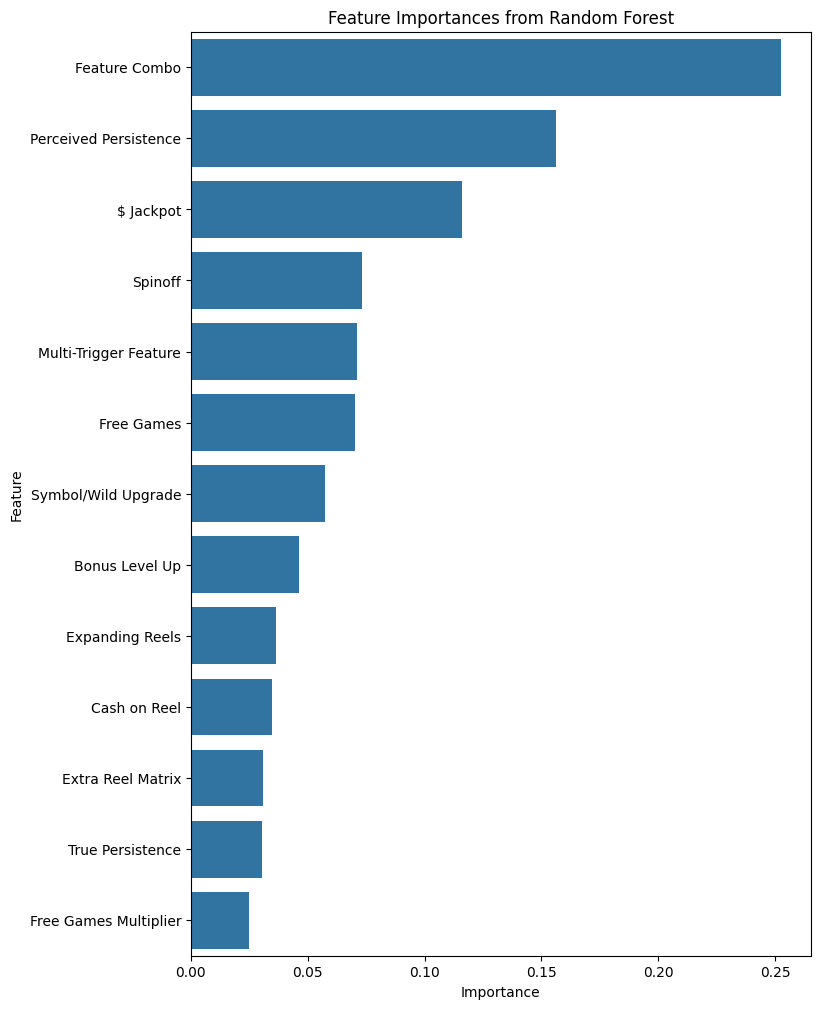

In [ ]:
# Plot feature importances
plt.figure(figsize=(8, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Overall Comment:


*   This analysis contains the effect of features on index score.
*   features who contains missing values were filled with 0 [as per suggestion].


*   Lasso regression were used for feature selection through which 13 features were selected from 60 features.
*   With the selected features, a Random Forest model was fitted to measure how much the importance is.

*   The results are showed in a bar plot.
*   This model explains 59.73 % of total variation.







#Problem 6 Solution:
** Determine which features and attributes are most important for game performance.**

---



In [ ]:
df_6 = df.drop(binary_columns, axis = 1)
df_6 = df_6.drop('Unnamed: 0',axis = 1)
df_6.head(5)

,Segment,Genre,Theme,Art Style,Type,Subtype,Base Game,Base Game Trigger,Triggered Feature 1,Trigger,...,Supplier_mapped,Cluster Pays,Gamble,Growing Multiplier,Horizontal Reel,Megaways,Random Feature Modifier,Slingo,Symbol Expansion,Theo Win Index vs House Log
0,New Core Video,Animal,Eagle,NaN,Free Games,Free Games/Sticky Wilds,NaN,NaN,Free Games with Sticky Wilds,3 Symbols,...,supplier10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012474
1,New Core Video,Asian,Phoenix,NaN,Hold & Spin,Free Games/Hold & Spin,NaN,NaN,Hold & Spin with Cash on Reels Level Up,6 Symbols,...,supplier10,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,-0.276318
2,Low Denom Core Video,NaN,Tiger,NaN,Wilds,Persistence/Wilds,NaN,NaN,Persistent Wilds,NaN,...,supplier1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.053187
3,Low Denom Core Video,NaN,Gorilla,NaN,Wilds,Persistence/Wilds,NaN,NaN,Persistent Wilds,NaN,...,supplier1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.151193
4,Low Denom Core Video,NaN,Dragon,NaN,Wild Multiplier,Free Games/Wild Multiplier,NaN,NaN,Free Games with Wild Multiplier,NaN,...,supplier1,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.332181


In [ ]:
# Find missing data values
missing_data = df_6.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_percentage_columns = missing_data_percentage[missing_data_percentage > 0]
print(missing_data_percentage_columns)

Genre                               87.877380
Theme                                2.647469
Art Style                           96.160396
Subtype                              0.572844
Base Game                           58.422356
Base Game Trigger                   93.768385
Triggered Feature 1                  2.469423
Trigger                             45.076637
Jackpot Bonus                       53.421582
Jackpot Trigger                     83.681684
Free Games Style (if applicable)    48.846571
Frequent Cabinet                     0.952160
Reel Matrix                          5.751664
Min Bet                              9.986066
Cluster Pays                        29.749187
Gamble                              53.669299
Growing Multiplier                  94.604428
Horizontal Reel                     54.195696
Megaways                            29.694999
Random Feature Modifier             93.381328
Slingo                              53.669299
Symbol Expansion                  

In [ ]:
# Define the threshold for dropping columns
threshold = 0.20

# Drop columns with more than 30% missing values
df_6_cleaned = df_6.loc[:, df.isnull().mean() <= threshold]

# Display the remaining columns
print(df_6_cleaned.columns)

Index(['Segment', 'Theme', 'Type', 'Subtype', 'Triggered Feature 1',
       'Frequent Cabinet', 'Reel Matrix', 'Rank', 'year', '# Casinos',
       '# Units', 'Min Bet', 'Theo Win Index vs House', 'Supplier_mapped',
       'Theo Win Index vs House Log'],
      dtype='object')


In [ ]:
# List of columns to fill missing values
columns_to_fill = [
    'Theme', 'Subtype', 'Triggered Feature 1', 'Frequent Cabinet', 'Reel Matrix', 'Min Bet']

# Fill missing values in the specified columns with the category 'Missing'
df_6_cleaned[columns_to_fill] = df_6_cleaned[columns_to_fill].fillna('Missing')

In [ ]:
# Find missing data values
missing_data = df_6_cleaned.isnull().sum()

# Display columns with missing values and the count of missing values
missing_columns = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df)) * 100
missing_data_percentage_columns = missing_data_percentage[missing_data_percentage > 0]
print(missing_data_percentage_columns)

Series([], dtype: float64)


In [ ]:


df_6_final_dummy = pd.get_dummies(df_6_cleaned, drop_first = True).astype('int')

In [ ]:

df_6_final_dummy = df_6_final_dummy.drop(['year','Rank', '# Casinos', '# Units', 'Theo Win Index vs House', 'Theo Win Index vs House Log'], axis = 1)

In [ ]:
df_6_final = pd.concat([df_6_final_dummy,df_2_log], axis = 1)

In [ ]:
df_6_final.columns

Index(['Segment_New Core Video', 'Theme_African', 'Theme_America',
       'Theme_Animal', 'Theme_Animals', 'Theme_Asian', 'Theme_Australia',
       'Theme_Aztec', 'Theme_Baby', 'Theme_Badger',
       ...
       'Supplier_mapped_supplier3', 'Supplier_mapped_supplier4',
       'Supplier_mapped_supplier5', 'Supplier_mapped_supplier6',
       'Supplier_mapped_supplier7', 'Supplier_mapped_supplier8',
       'Supplier_mapped_supplier9', '# Casinos_log', '# Units_log',
       'Theo Win Index vs House_log'],
      dtype='object', length=826)

In [ ]:
# Extract the columns to be standardized
columns_to_standardize = ['# Casinos_log', '# Units_log']
X = df_6_final[columns_to_standardize]

# Standardize the columns
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=columns_to_standardize, index=df_6_final.index)

# Concatenate the standardized columns with the original DataFrame
df_6_final_standardized = pd.concat([df_6_final.drop(columns=columns_to_standardize), X_standardized_df], axis=1)


In [ ]:
# Define the dependent variable and features
dependent_var = 'Theo Win Index vs House_log'
features = df_6_final_standardized.columns.difference([dependent_var])

# Extract the dependent variable and feature matrix
X = df_6_final_standardized[features]
y = df_6_final_standardized[dependent_var]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
selected_feature = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 825
selected features: 18
features with coefficients shrank to zero: 807


In [ ]:
X =df_6_final_standardized[selected_feature]
y = df_6_final_standardized['Theo Win Index vs House_log']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.05810472448238171
R-squared: 0.5827044025543414


In [ ]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)



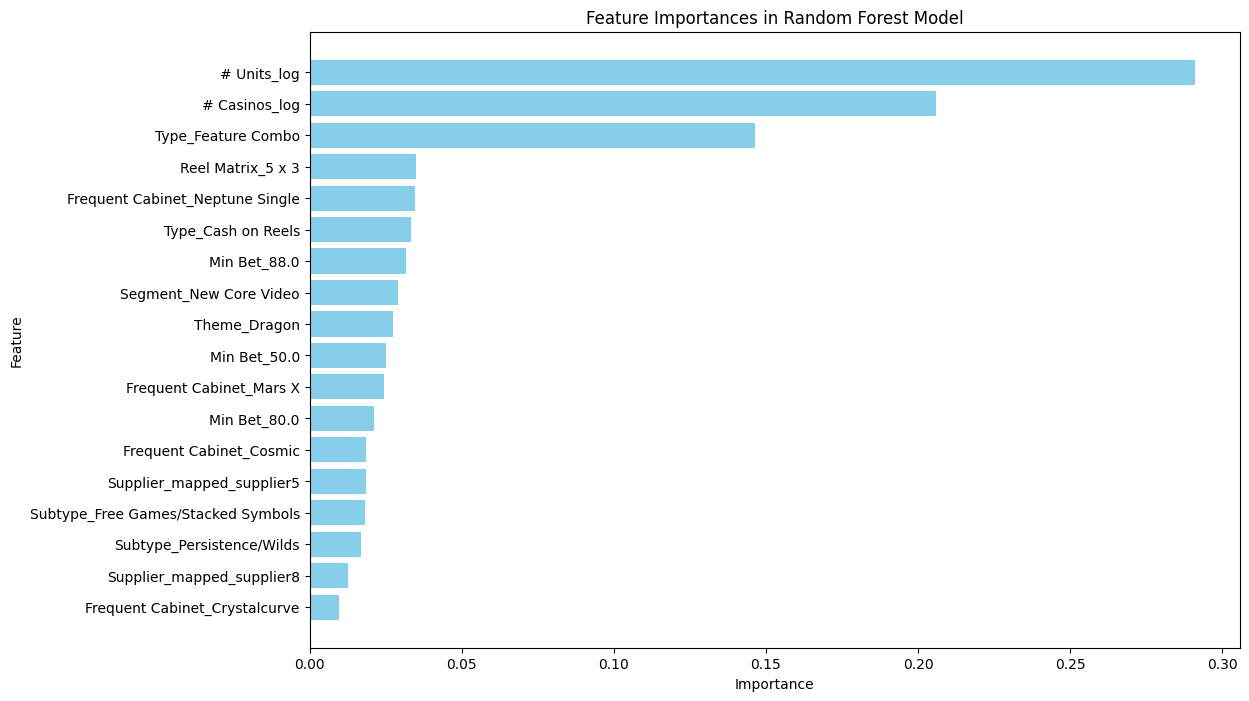

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

Overall Comment:


*   The attributes containing more than 20% of missing values were dropped of.
*   All other missing values were categorized as 'Missing'.
*   Lasso regression were used for feature selection through which 18 features were selected from 825 features.
*   With the selected features, a Random Forest model was fitted to measure how much the importance is.
*   The results are showed in a bar plot.
*  This model explains 58.27% of total variation.







#Problem 7 Solution :
**Comparative Analysis of Top and Bottom Performers**

---



In [ ]:
df_casino_unit = df_2_log[['# Casinos_log', '# Units_log']]
supplier_dummy = pd.get_dummies(df['Supplier_mapped'], drop_first=True).astype('int')

In [ ]:
df_7 = pd.concat([supplier_dummy,df_casino_unit,df_binary_filled,df['Theo Win Index vs House Log']], axis = 1)

In [ ]:
df_7.head()

,supplier10,supplier11,supplier12,supplier13,supplier14,supplier15,supplier2,supplier3,supplier4,supplier5,...,Sticky Wilds,Superways,Symbol Catch,Symbol/Wild Upgrade,True Persistence,Variable Ways,Wheel,Wild Multiplier,Wild Reel,Theo Win Index vs House Log
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012474
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.276318
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.053187
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.151193
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.332181


In [ ]:
import pandas as pd

# Define thresholds for top, medium, and bottom categories
top_threshold = df_7['Theo Win Index vs House Log'].quantile(0.75)
bottom_threshold = df_7['Theo Win Index vs House Log'].quantile(0.25)

# Categorize into top, medium, and bottom
df_7['Performance Category'] = pd.cut(df_7['Theo Win Index vs House Log'],
                                      bins=[-float('inf'), bottom_threshold, top_threshold, float('inf')],
                                      labels=['Bottom', 'Medium', 'Top'])


In [ ]:
# Separate datasets for each category
df_top = df_7[df_7['Performance Category'] == 'Top']
df_medium = df_7[df_7['Performance Category'] == 'Medium']
df_bottom = df_7[df_7['Performance Category'] == 'Bottom']



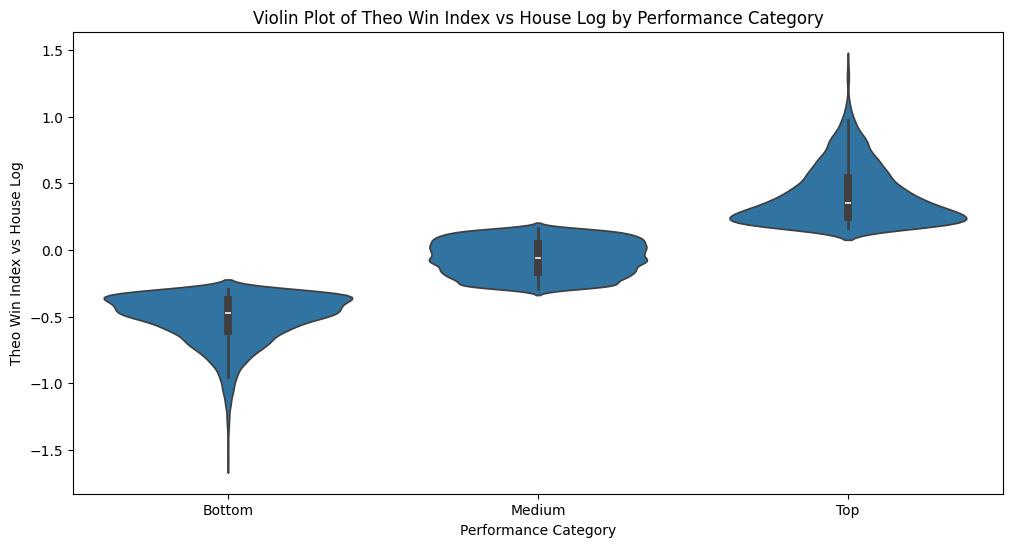

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Performance Category', y='Theo Win Index vs House Log', data=df_7)
plt.title('Violin Plot of Theo Win Index vs House Log by Performance Category')
plt.show()

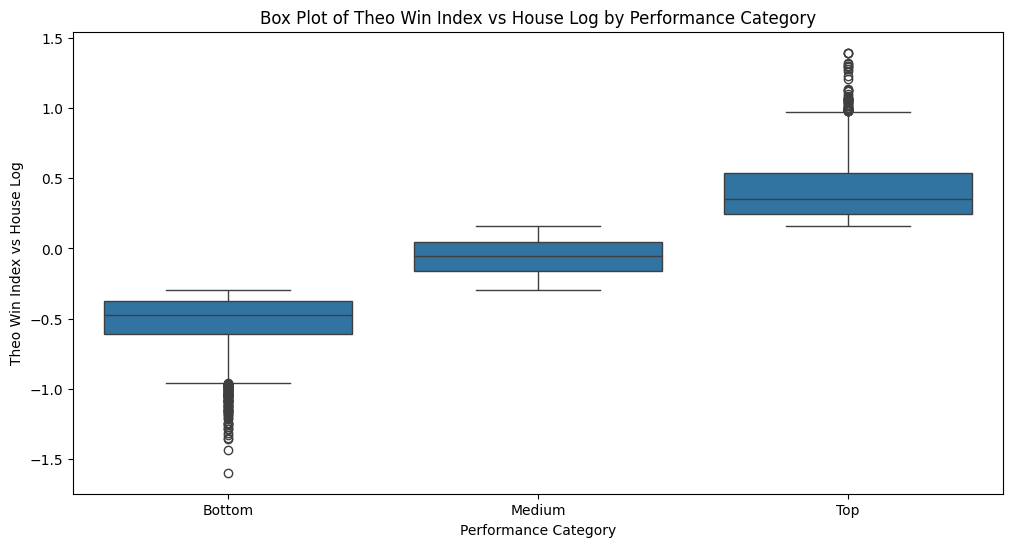

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Performance Category', y='Theo Win Index vs House Log', data=df_7)
plt.title('Box Plot of Theo Win Index vs House Log by Performance Category')
plt.show()


In [ ]:
mean_values = df_7.groupby('Performance Category')['Theo Win Index vs House Log'].mean()
print(np.exp(mean_values))


Performance Category
Bottom    0.596325
Medium    0.942353
Top       1.510518
Name: Theo Win Index vs House Log, dtype: float64


In [ ]:
# Merge top and bottom categories
df_top_bottom = pd.concat([df_top, df_bottom])


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
# Define features and target for Lasso
X = df_top_bottom.drop(['Theo Win Index vs House Log', 'Performance Category'], axis =1 )
y = df_top_bottom['Performance Category'].apply(lambda x: 1 if x == 'Top' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which columns to standardize and which to leave unchanged
numerical_features = ['# Casinos_log', '# Units_log']
categorical_features = list(set(X_train.columns) - set(numerical_features))

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)  # 'passthrough' keeps categorical columns unchanged
    ])

# Fit and transform the data using the ColumnTransformer
X_train_transformed = preprocessor.fit_transform(X_train)

# Fit Lasso regression on transformed data
lasso = Lasso(alpha=0.005, random_state=0)
lasso.fit(X_train_transformed, y_train)

# Feature selection using SelectFromModel
feature_sel_model = SelectFromModel(lasso)
feature_sel_model.fit(X_train_transformed, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True])

In [ ]:
selected_feature3 = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 76
selected features: 18
features with coefficients shrank to zero: 51


In [ ]:
from sklearn.linear_model import LogisticRegression
# Use selected features for logistic regression
X_selected = X[selected_feature3]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = log_reg.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8034055727554179


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       676
           1       0.78      0.82      0.80       616

    accuracy                           0.80      1292
   macro avg       0.80      0.80      0.80      1292
weighted avg       0.80      0.80      0.80      1292



In [ ]:
import numpy as np

# Extract coefficients and calculate odds ratios
odds_ratios = np.exp(log_reg.coef_[0])
odds_ratios_df = pd.DataFrame({'Feature': selected_feature3, 'Odds Ratio': odds_ratios})
odds_ratios_df = odds_ratios_df.sort_values(by='Odds Ratio', ascending=False)
print("Odds Ratios from Logistic Regression:")
print(odds_ratios_df)


Odds Ratios from Logistic Regression:
                        Feature  Odds Ratio
22                Split Symbols   29.000951
17        Perceived Persistence   24.067841
16            Non-$ Progressive   10.400138
15                    Multigame    8.192779
4                     supplier6    7.576080
21                Second Chance    5.216386
13        Multi-Trigger Feature    4.703458
11                   Free Games    2.430102
14        Multi-Trigger Jackpot    2.370134
8              Bet Up Incentive    1.839546
7             Base Game Feature    1.834353
19  RTP-Neutral Personalization    1.687000
24                    Wild Reel    1.234160
5                     supplier8    1.104404
9                Both Ways Pays    1.000000
10              Expanding Wilds    0.870451
18                Player Choice    0.845293
20    Random Base Game Modifier    0.786405
6                     supplier9    0.471794
3                     supplier5    0.458889
2                    supplier12    0.3

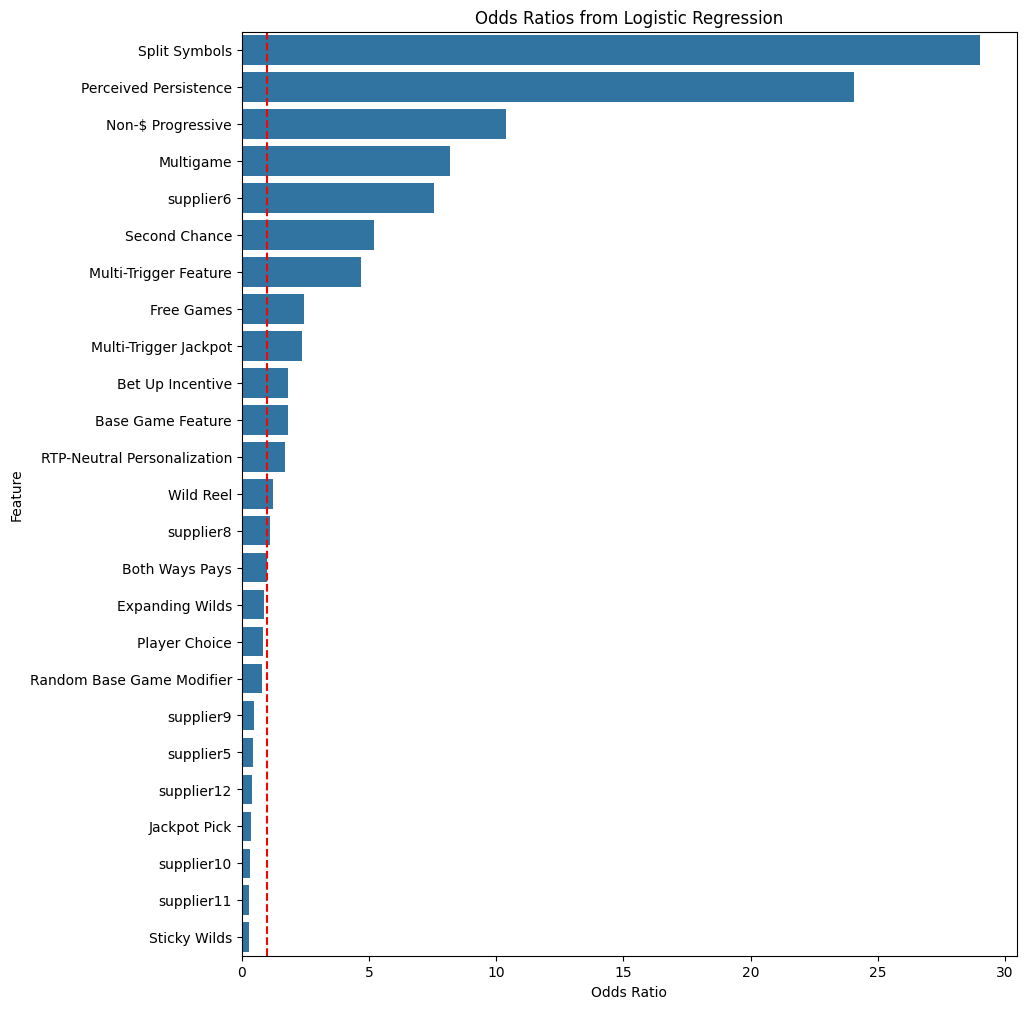

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))
sns.barplot(x='Odds Ratio', y='Feature', data=odds_ratios_df)
plt.axvline(x=1, color='red', linestyle='--')  # Make a cut in the y-axis at point 1
plt.title('Odds Ratios from Logistic Regression')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.show()


Overall Comment:

*   The dataset was divide into 3 parts based on the percentile of the index score. Top = above .75, bottom = under .25, medium = .25 to .75.
*   Descriptive were reported with violinplot and boxplot through which we can see the distribution of values and some outliers.
* Lasso regression were used for feature selection through which 18 features were selected from 76 features.
* With the selected features, a Logistic regression model was fitted to measure the odds ratio.
* odds ratio are presented in the bar plot with a cut in x=1. so the odds ratio less than the 1 which are on the left side of the line have influence on bottom performing games and the odds ratio greater than the 1 which are on the right side of the line have influence on Top performing games.
* The model comes with a 80.02% accuracy which is very good.


